In [31]:
#---- Install required Libraries----
#pip install pandas
#pip install sklearn
#pip install sklearn
#pip install matplotlib
#pip install seaborn

# Define

**Project Goal**
- The data is related with direct marketing campaigns of a Portuguese banking institution. 
- The marketing campaigns were based on phone calls. 
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- The classification project goal is to **predict** if the client will subscribe (yes/no) a term deposit (variable y).

**Practical Use**

**Data Gathering**
- There are four datasets:
1) bank-additional-full.csv 
    - with all examples (41188) and 20 inputs
    - ordered by date (from May 2008 to November 2010)
2) bank-additional.csv 
    - with 10% of the examples (4119)
    - randomly selected from 1 and 20 inputs.
3) bank-full.csv
    - with all examples and 17 inputs
    - ordered by date (older version of this dataset with less inputs).
4) bank.csv 
    - with 10% of the examples and 17 inputs
    - randomly selected from 3 (older version of this dataset with less inputs).
    - The smallest datasets are provided to test more computationally demanding machine learning algorithms 

**Selected Datasets**
- I selected **bank-additional-full.csv** file for implementing project

# Discover

In [3]:
#---Import all required libraries---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Loading**

In [4]:
TrainDataFrame = pd.read_csv("/Users/ganesh_dhasade/Documents/GitHub/BankMarketing_Classification_Project/Dataset/bank-additional/bank-additional-full.csv", sep = ';')
TestDataFrame = pd.read_csv("/Users/ganesh_dhasade/Documents/GitHub/BankMarketing_Classification_Project/Dataset/bank-additional/bank-additional.csv", sep = ';')


In [5]:
TrainDataFrame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
TestDataFrame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
TrainDataFrame.shape

(41188, 21)

In [8]:
TestDataFrame.shape

(4119, 21)

### Data Understanding
Input variables:  
**bank client data:**
1. age (numeric)
2. job - type of job (categorical):
    - 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-  employed', 'services', 'student', 'technician', 'unemployed', 'unknown'
        
3. marital - maritail status (categorical):
    - 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
        
4. education (categorical):
    - 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default - has credit in default? (categorical):
    - 'no','yes','unknown'
6. housing - has housing loan? (categorical):
    - 'no','yes','unknown'
7. loan- has personal loan? (categorical): 
    - 'no','yes','unknown'

**related with the last contact of the current campaign:**
8. contact - contact communication type (categorical): 
    - 'cellular','telephone'
9. month - last contact month of year (categorical): 
    - 'jan', 'feb', 'mar', ..., 'nov', 'dec'
10. day_of_week - last contact day of the week (categorical): 
    - 'mon','tue','wed','thu','fri'
11. duration: last contact duration, in seconds (numeric):
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
**other attributes:**
12. campaign - includes last contact (numeric): 
    - number of contacts performed during this campaign and for this client 
13. pdays - 999 means client was not previously contacted (numeric): 
    - number of days that passed by after the client was last contacted from a previous campaign
14. previous (numeric): 
    - number of contacts performed before this campaign and for this client 
15. poutcome - outcome of the previous marketing campaign (categorical): 
    - 'failure','nonexistent','success'
    
**social and economic context attributes**
16. emp.var.rate - employment variation rate (numeric): 
    - quarterly indicator 
17. cons.price.idx (numeric): 
    - consumer price index - monthly indicator 
18. cons.conf.idx (numeric): 
    - consumer confidence index - monthly indicator 
19. euribor3m (numeric): 
    - euribor 3 month rate - daily indicator 
20. nr.employed (numeric): 
    - number of employees - quarterly indicator 

**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary): 
    - 'yes','no'

### Clean DataSet

In [16]:
#Functions used while cleaning Dataset
import matplotlib.gridspec as gridspec

def Check_Null_Values(dataframe):
    print(dataframe.info())
    sns.heatmap(dataframe.isnull(),yticklabels=False, cmap='viridis').set_title('Null Values in each columns')
    
    
def Check_Balance_Specific_Col(dataframe, Col_Names):
    #Col_Names = dataframe.columns.tolist()
    plt.figure(figsize=(9,3))
    for col in Col_Names:
        ValCount = dataframe[col].value_counts()
        PerCount = (ValCount / ValCount.sum())*100 
        plt.bar(ValCount.index,PerCount)
        #plt.xticks(ValCount.index,ValCount.index.values)
        plt.xticks(PerCount.index,PerCount.index.values)
        plt.ylabel("Frequency")
        plt.title('Distribution of Data')
        plt.show()
        print("Feature Name: {}: \n {}".format(col,ValCount))
        print("Feature Name: {}: \n Percent Count \n{}".format(col,PerCount))
        
def Check_Balance2(dataframe):
    Col_Names = dataframe.columns.tolist()
    nrows = int(len(Col_Names)/2) +1
    fig = plt.figure()
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15,40))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle('Distributions of dataset Features')
    for ax, col in zip(axes.flatten(), Col_Names):
        ValCount = dataframe[col].value_counts()
        ax.bar(ValCount.index,ValCount)
        ax.set_xticks(ValCount.index.values)
        #axs.set_xticklabels("Frequency")
        #ax.show()
    
    

In [10]:
Col = TrainDataFrame1.columns.tolist()
int(len(Col)/2) +1

11

In [9]:
TrainDataFrame1 = TrainDataFrame.copy()
TestDataFrame1 = TestDataFrame.copy()

In [12]:
TestDataFrame1.shape

(4119, 21)

In [13]:
TrainDataFrame1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
TestDataFrame1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

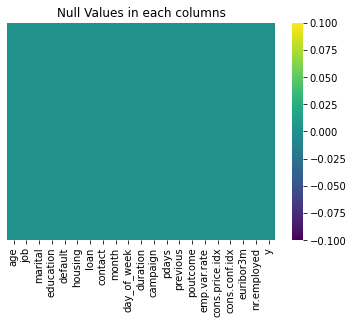

In [17]:
Check_Null_Values(TrainDataFrame1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

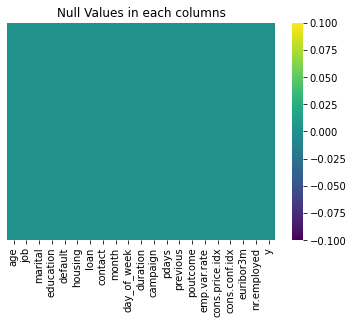

In [18]:
Check_Null_Values(TestDataFrame1)

**Observation**
- Datasets is clean there zero null values present.

**Check dataset Balanced/Imbalanced**

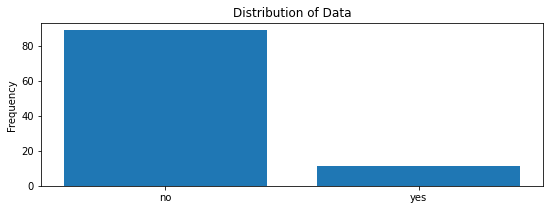

Feature Name: y: 
 no     36548
yes     4640
Name: y, dtype: int64
Feature Name: y: 
 Percent Count 
no     88.734583
yes    11.265417
Name: y, dtype: float64


In [21]:
Col = ["y"]
Check_Balance_Specific_Col(TrainDataFrame1, Col)

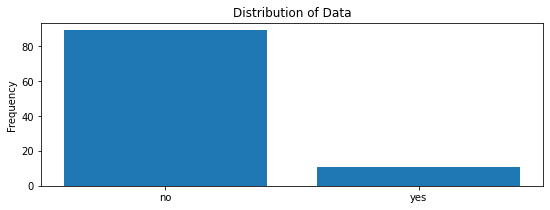

Feature Name: y: 
 no     3668
yes     451
Name: y, dtype: int64
Feature Name: y: 
 Percent Count 
no     89.05074
yes    10.94926
Name: y, dtype: float64


In [20]:
Col = ["y"]
Check_Balance_Specific_Col(TestDataFrame1, Col)

In [142]:
a = DataFrame1["y"].value_counts()
print(a)
percent = (a / a.sum())*100
print(percent)

no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64


**Observation**
- Data is imbalanced.
- Need to balance.
- Before that need to handle categorical vairables.

### EDA

In [22]:
def Encode_Data(dataframe):   
    from sklearn.preprocessing import LabelEncoder
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe


def Display_Correlation(EncodedData):
    plt.figure(figsize=(20,15))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="PRGn",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
    plt.show()

In [23]:
EDADataFrame = TrainDataFrame1.copy()

In [24]:
EDADataFrame.shape

(41188, 21)

In [25]:
EncodedData = Encode_Data(EDADataFrame)

In [26]:
EncodedData.shape

(41188, 21)

In [27]:
EncodedData['job'].value_counts()

0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64

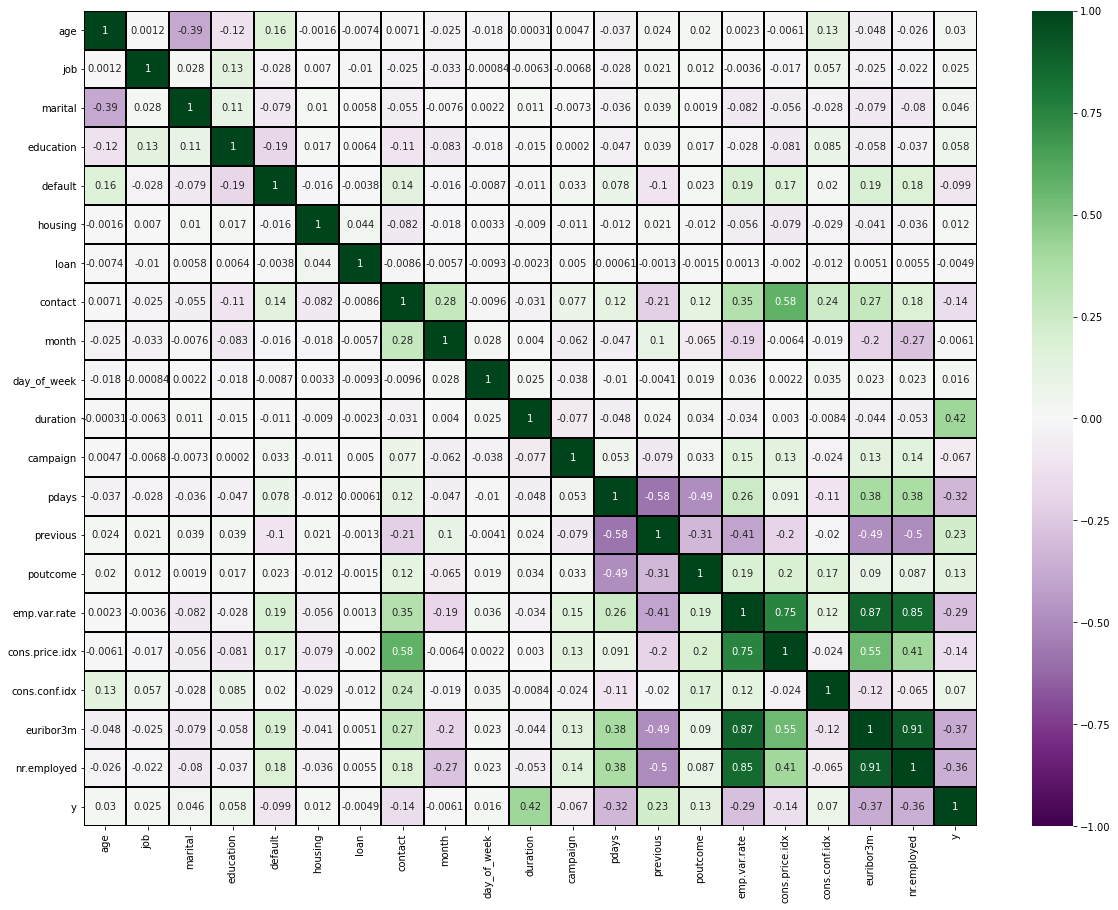

In [28]:
Display_Correlation(EncodedData)

### Correlation Inference:
- y is highly correlated with:
    - duaration : 0.42
    - previous : 0.23
    - poutcome : 0.13
    - cons.conif.idx : 0.07

**Prepare Dataset**

In [29]:
DataFrame2 = TrainDataFrame1.copy()

In [30]:
DataFrame2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [31]:
def Count_CatVar(dataframe):
    CatCol = dataframe.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(CatCol):
        print("------------",col," value counts---------------------")
        print(dataframe[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in CatCol:
        a = dataframe[i].unique()
        print("There are {} categories in {}".format(len(a),i))

In [32]:
Count_CatVar(DataFrame2)

------------ job  value counts---------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------ marital  value counts---------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------ education  value counts---------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------ default  value counts---------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
------------ housing  value counts---

## Analysis
##### From above results we can infer below information for dataset:
- There are 11 categorical column and each have 
    1. 12 categories in job
    2. 4 categories in marital
    3. 8 categories in education
    4. 3 categories in default
    5. 3 categories in housing
    6. 3 categories in loan
    7. 2 categories in contact
    8. 10 categories in month
    9. 5 categories in day_of_week
    10. 3 categories in poutcome
    11. 2 categories in y
    
- It means total 53 dummies will be created (exclude target col)
- But we use one hot encoding and remove one category from each category to reduce 10 more features
- Hence, total 43 new features(dummies) will be created.
- Already there are 10 integer/float
   - 10 integer columns + 43 dummies
   - Hence, total 53 features will be there.

In [33]:
#as we dont want to create dummies of target vairable
DataFrame3 = DataFrame2.drop(['y'], axis = 1)
DataFrame3 = pd.get_dummies(DataFrame3, drop_first=True)

In [47]:
# Create dummies for test dataset
TestDataFrame3 = TestDataFrame1.copy()

In [48]:
TestDataFrame3 = TestDataFrame3.drop(['y'], axis = 1)
TestDataFrame3 = pd.get_dummies(TestDataFrame3, drop_first=True)

In [50]:
TestDataFrame3.shape

(4119, 53)

In [34]:
DataFrame3.shape

(41188, 53)

**Dataset ready to handle imbalanced**

#### Handle Imbalanced Dataset

In [51]:
X = DataFrame3
Y = DataFrame2['y']

In [52]:
print(X.shape, Y.shape)

(41188, 53) (41188,)


In [53]:
from imblearn.combine import SMOTETomek

In [54]:
smk = SMOTETomek(random_state = 42)

In [55]:
X_res, Y_res = smk.fit_sample(X,Y)

In [56]:
print(X_res.shape, Y_res.shape)

(72498, 53) (72498,)


In [57]:
from collections import Counter

In [58]:
print("Original dataset shape {}".format(Counter(Y)))
print("Sampled dataset shape {}".format(Counter(Y_res)))

Original dataset shape Counter({'no': 36548, 'yes': 4640})
Sampled dataset shape Counter({'no': 36249, 'yes': 36249})


In [59]:
Y_res.value_counts()

yes    36249
no     36249
Name: y, dtype: int64

# Development

In [60]:
X_res
Y_res

0         no
1         no
2         no
3         no
4         no
        ... 
72493    yes
72494    yes
72495    yes
72496    yes
72497    yes
Name: y, Length: 72498, dtype: object

In [61]:
# check with imbalanced dataset
Y.shape

(41188,)

In [62]:
#-------Establish Base Model ---------

- As LogisticRegression is very popular for Classification problem
- Hence, i am taking LogisticRegression as base model
- Perform 5-fold cross-validation to check Accuracy.

In [63]:
from sklearn.model_selection import train_test_split 
X_BaseTrain, X_BaseTest, Y_BaseTrain, Y_BaseTest = train_test_split(X_res, Y_res, test_size = 0.30, random_state = 0)
X_IMBTrain, X_IMBTest, Y_IMBTrain, Y_IMBTest = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [64]:
from sklearn.linear_model import LogisticRegression
BaseModel = LogisticRegression(max_iter=1200000)
IMBModel = LogisticRegression(max_iter=1200000)

In [65]:
BaseModel.fit(X_BaseTrain, Y_BaseTrain)
IMBModel.fit(X_IMBTrain, Y_IMBTrain)

LogisticRegression(max_iter=1200000)

In [288]:
print("Accracy of train Base Model:",BaseModel.score(X_BaseTrain, Y_BaseTrain)*100,"%")
print("Accracy of train IMBalanced Model:",IMBModel.score(X_IMBTrain, Y_IMBTrain)*100,"%")

Accracy of train Base Model: 93.6155119413573 %
Accracy of train IMBalanced Model: 90.98192917345912 %


In [289]:
BaseModel_Pred = BaseModel.predict(X_BaseTest)
IMBModel_Pred = IMBModel.predict(X_IMBTest)

In [290]:
import sklearn.metrics as metrics
print("Base model Classifier Accuracy:",metrics.accuracy_score(Y_BaseTest, BaseModel_Pred)*100,"%")
print("IMB model Classifier Accuracy:",metrics.accuracy_score(Y_IMBTest, IMBModel_Pred)*100,"%")

Base model Classifier Accuracy: 93.71954022988506 %
IMB model Classifier Accuracy: 91.09007040543821 %


In [295]:
Y_BaseTest

69986    yes
40806     no
52585    yes
16278    yes
55901    yes
        ... 
40620    yes
673       no
62811    yes
48713    yes
3986      no
Name: y, Length: 21750, dtype: object

In [298]:
TestCount = pd.DataFrame(Y_BaseTest)
numOfDetractor = len(TestCount[TestCount.y == 'no'].index)
numOfPromoters = len(TestCount[TestCount.y == 'yes'].index)
print('Number of Detractors : ', numOfDetractor)
print('Number of Promoters : ', numOfPromoters)

Number of Detractors :  10770
Number of Promoters :  10980


In [301]:
import termtables as tt

 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   10770
 ------------------------------------- 
  Number of Promoters :    10980
 ------------------------------------- 


<AxesSubplot:>

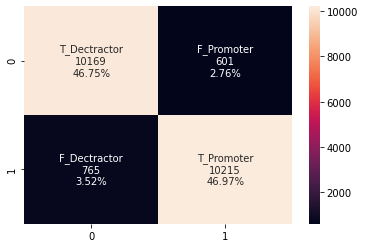

In [302]:
#Generate Legend
string = tt.to_string(
    [["Number of Detractors :", numOfDetractor], ["Number of Promoters :", numOfPromoters]],
    header=["User_Type", "TotalCount"],
    #style=tt.styles.ascii_thin_double,
    style =tt.styles.ascii_booktabs,
    # alignment="ll",
    # padding=(0, 1),
)
print(string)

#Implement Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
ConfusionMatrix =confusion_matrix(Y_BaseTest, BaseModel_Pred)
group_names = ['T_Dectractor','F_Promoter','F_Dectractor','T_Promoter']
group_counts = ["{0:0.0f}".format(value) for value in
                ConfusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     ConfusionMatrix.flatten()/np.sum(ConfusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
# Plot Confusion Matrix using sns heat map
sns.heatmap(ConfusionMatrix, annot=labels, fmt='', cmap='rocket')

---- Try some other alogrithms ----  
- RandomForestClsssifider  
- GaussianNB  
- DecisionTreeClassifier  

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [319]:
ClassifierModels = []

RFClassifierModel = RandomForestClassifier(criterion = 'entropy', n_estimators = 10,  random_state = 0)
ClassifierModels.append(RFClassifierModel)
NBModel = GaussianNB()
ClassifierModels.append(NBModel)
DecisionTreeModel = DecisionTreeClassifier(criterion = 'entropy')
ClassifierModels.append(DecisionTreeModel)
#Create a svm Classifier
#SVMClassifer = svm.SVC(kernel='linear') # Linear Kernel
#ClassifierModels.append(SVMClassifer)



------------- RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) -----------------

Accuracy  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) is :  0.9497011494252874
[[10234   536]
 [  558 10422]]


------------- GaussianNB() -----------------

Accuracy  GaussianNB() is :  0.8709885057471264
[[9047 1723]
 [1083 9897]]


------------- DecisionTreeClassifier(criterion='entropy') -----------------

Accuracy  DecisionTreeClassifier(criterion='entropy') is :  0.9335632183908046
[[ 9972   798]
 [  647 10333]]


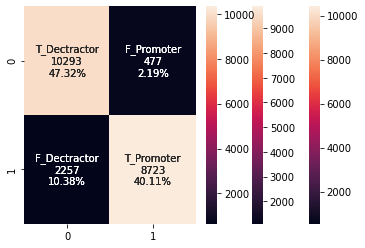

In [321]:
Prediction = []
for ClassifierModelName in ClassifierModels:
    
    print("\n\n-------------",ClassifierModelName,"-----------------\n")
    
    ClassifierModelName.fit(X_BaseTrain, Y_BaseTrain)
    y_Pred= ClassifierModelName.predict(X_BaseTest)
    Prediction.append(y_Pred)
    Accuracy = metrics.accuracy_score(Y_BaseTest, y_Pred)

    print("Accuracy ",ClassifierModelName,"is : ",Accuracy)
    ConfusionMatrix1 =confusion_matrix(Y_BaseTest, y_Pred)
    print(ConfusionMatrix1)
    sns.heatmap(ConfusionMatrix1, annot=labels, fmt='', cmap='rocket')

In [306]:
PredictionIMB = []
for ClassifierModelName in ClassifierModels:
    
    print("\n\n-------------",ClassifierModelName,"-----------------\n")
    
    ClassifierModelName.fit(X_IMBTrain, Y_IMBTrain)
    y_Pred= ClassifierModelName.predict(X_IMBTest)
    PredictionIMB.append(y_Pred)
    Accuracy = metrics.accuracy_score(Y_IMBTest, y_Pred)

    print("Accuracy ",ClassifierModelName,"is : ",Accuracy)
    ConfusionMatrix =confusion_matrix(Y_IMBTest, y_Pred)
    print(ConfusionMatrix)



------------- RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) -----------------

Accuracy  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) is :  0.9079873755765963


------------- GaussianNB() -----------------

Accuracy  GaussianNB() is :  0.8763453912761997


------------- DecisionTreeClassifier(criterion='entropy') -----------------

Accuracy  DecisionTreeClassifier(criterion='entropy') is :  0.8929351784413693


------------- SVC(kernel='linear') -----------------

Accuracy  SVC(kernel='linear') is :  0.8994092417253379


### Model Evaluation

In [313]:
count = 0
for i in Prediction:
    print(i)
    print(count)
    count = count + 1

['yes' 'yes' 'yes' ... 'yes' 'yes' 'no']
0
['yes' 'yes' 'yes' ... 'yes' 'yes' 'no']
1
['yes' 'no' 'yes' ... 'yes' 'yes' 'no']
2
['yes' 'yes' 'no' ... 'no' 'yes' 'no']
3


In [314]:
for i in Prediction: 
    TestCount = pd.DataFrame(i)
    numOfDetractor = len(TestCount[TestCount == 'no'].index)
    numOfPromoters = len(TestCount[TestCount == 'yes'].index)
    print('Number of Detractors : ', numOfDetractor)
    print('Number of Promoters : ', numOfPromoters)
    #Generate Legend
    string = tt.to_string(
        [["Number of Detractors :", numOfDetractor], ["Number of Promoters :", numOfPromoters]],
        header=["User_Type", "TotalCount"],
        #style=tt.styles.ascii_thin_double,
        style =tt.styles.ascii_booktabs,
        # alignment="ll",
        # padding=(0, 1),
    )
    print(string)

Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of De

Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
[[10234   536]
 [  558 10422]]
Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
[[9047 1723]
 [1083 9897]]
Number of Detractors :  21750
Number of Promoters :  21750
 ------------------------------------- 
  User_Type                TotalCount
  Number of Detractors :   21750
 ------------------------------------- 
  Number of Promoters :    21750
 ------------------------------------- 
[[ 9967   803]
 [  653 10327]]
Number of Detractors :  21750
Number of Promoters :  21750
 --

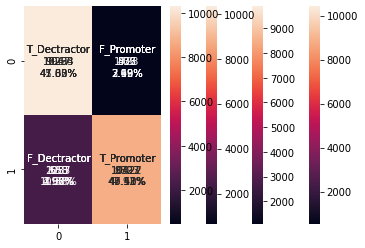

In [317]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for i in Prediction: 
    TestCount = pd.DataFrame(i)
    numOfDetractor = len(TestCount[TestCount == 'no'].index)
    numOfPromoters = len(TestCount[TestCount == 'yes'].index)
    print('Number of Detractors : ', numOfDetractor)
    print('Number of Promoters : ', numOfPromoters)
    #Generate Legend
    string = tt.to_string(
        [["Number of Detractors :", numOfDetractor], ["Number of Promoters :", numOfPromoters]],
        header=["User_Type", "TotalCount"],
        #style=tt.styles.ascii_thin_double,
        style =tt.styles.ascii_booktabs,
        # alignment="ll",
        # padding=(0, 1),
    )
    print(string)

    #Implement Confusion Matrix

    ConfusionMatrix =confusion_matrix(Y_BaseTest, i)
    group_names = ['T_Dectractor','F_Promoter','F_Dectractor','T_Promoter']
    group_counts = ["{0:0.0f}".format(value) for value in
                    ConfusionMatrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         ConfusionMatrix.flatten()/np.sum(ConfusionMatrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print(ConfusionMatrix)
    # Plot Confusion Matrix using sns heat map
    sns.heatmap(ConfusionMatrix, annot=labels, fmt='', cmap='rocket')

# Deployment